**Importing Libraries and Dataset**

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objs as go

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SolarPrediction.csv to SolarPrediction (2).csv


In [ ]:
df=pd.read_csv("SolarPrediction.csv")

In [ ]:
df.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%                147.700000      5.620000  
75%                179.310000      7.870000  
max                359.950000     40.500000

**Data Pre-Processing**

In [ ]:
df['time1'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['time2'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['time_diff'] = df['time1'] - df['time2']
df['SunDuration'] = df['time_diff'].dt.total_seconds() / 3600

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   UNIXTime                32686 non-null  int64          
 1   Data                    32686 non-null  object         
 2   Time                    32686 non-null  object         
 3   Radiation               32686 non-null  float64        
 4   Temperature             32686 non-null  int64          
 5   Pressure                32686 non-null  float64        
 6   Humidity                32686 non-null  int64          
 7   WindDirection(Degrees)  32686 non-null  float64        
 8   Speed                   32686 non-null  float64        
 9   TimeSunRise             32686 non-null  object         
 10  TimeSunSet              32686 non-null  object         
 11  time1                   32686 non-null  datetime64[ns] 
 12  time2                   32686 no

In [ ]:
df.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  \
0     30.46        59                  177.39   5.62    06:13:00   18:13:00   
1     30.46        58                  176.78   3.37    06:13:00   18:13:00   
2     30.46        57                  158.75   3.37    06:13:00   18:13:00   
3     30.46        60                  137.71   3.37    06:13:00   18:13:00   
4     30.46        62                  104.95   5.62    06:13:00   18:13:00   

                time1               time2       time_diff  SunDuration  
0 1900-01-01 18:13:00 1900-01-01 06:13:00 0 days 12:00:00         12.0  
1 1900-01-01 18:13:00 1900-01-01 06:13:00 0 days 12:00:00         12.0  
2 1900-01-01 18:13:00 1900-01-01 06:13:00 0 days 12:00:00         12.0  
3 1900-01-01 18:13:00 1900-01-01 06:13:00 0 days 12:00:00         12.0  
4 1900-01-01 18:13:00 1900-01-01 06:13:00 0 days 12:00:00         12.0

In [ ]:
df.count()

UNIXTime                  32686
Data                      32686
Time                      32686
Radiation                 32686
Temperature               32686
Pressure                  32686
Humidity                  32686
WindDirection(Degrees)    32686
Speed                     32686
TimeSunRise               32686
TimeSunSet                32686
time1                     32686
time2                     32686
time_diff                 32686
SunDuration               32686
dtype: int64

In [ ]:
df.nunique()

UNIXTime                  32686
Data                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
time1                        56
time2                        51
time_diff                    75
SunDuration                  75
dtype: int64

In [ ]:
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed                  time_diff  \
count            32686.000000  32686.000000                      32686   
mean               143.489821      6.243869  0 days 11:30:33.032490974   
std                 83.167500      3.490474  0 days 00:29:55.873501773   
min                  0.090000      0.000000            0 days 10:56:00   
25%                 82.227500      3.370000            0 days 11:02:00   
50%                147.700000      5.620000            0 days 11:24:00   
75%                179.310000      7.870000            0 days 11:55:00   
max                359.950000     40.500000            0 days 12:31:00   

        SunDuration  
count  32686.000000  
mean      11.509176  
std        0.498854  
min       10.933333  
25%       11.033333  
50%       11.400000  
75%       11.916667  
max       12.516667

In [ ]:
df = df.drop(['time1','time2'], axis=1)

**EDA**

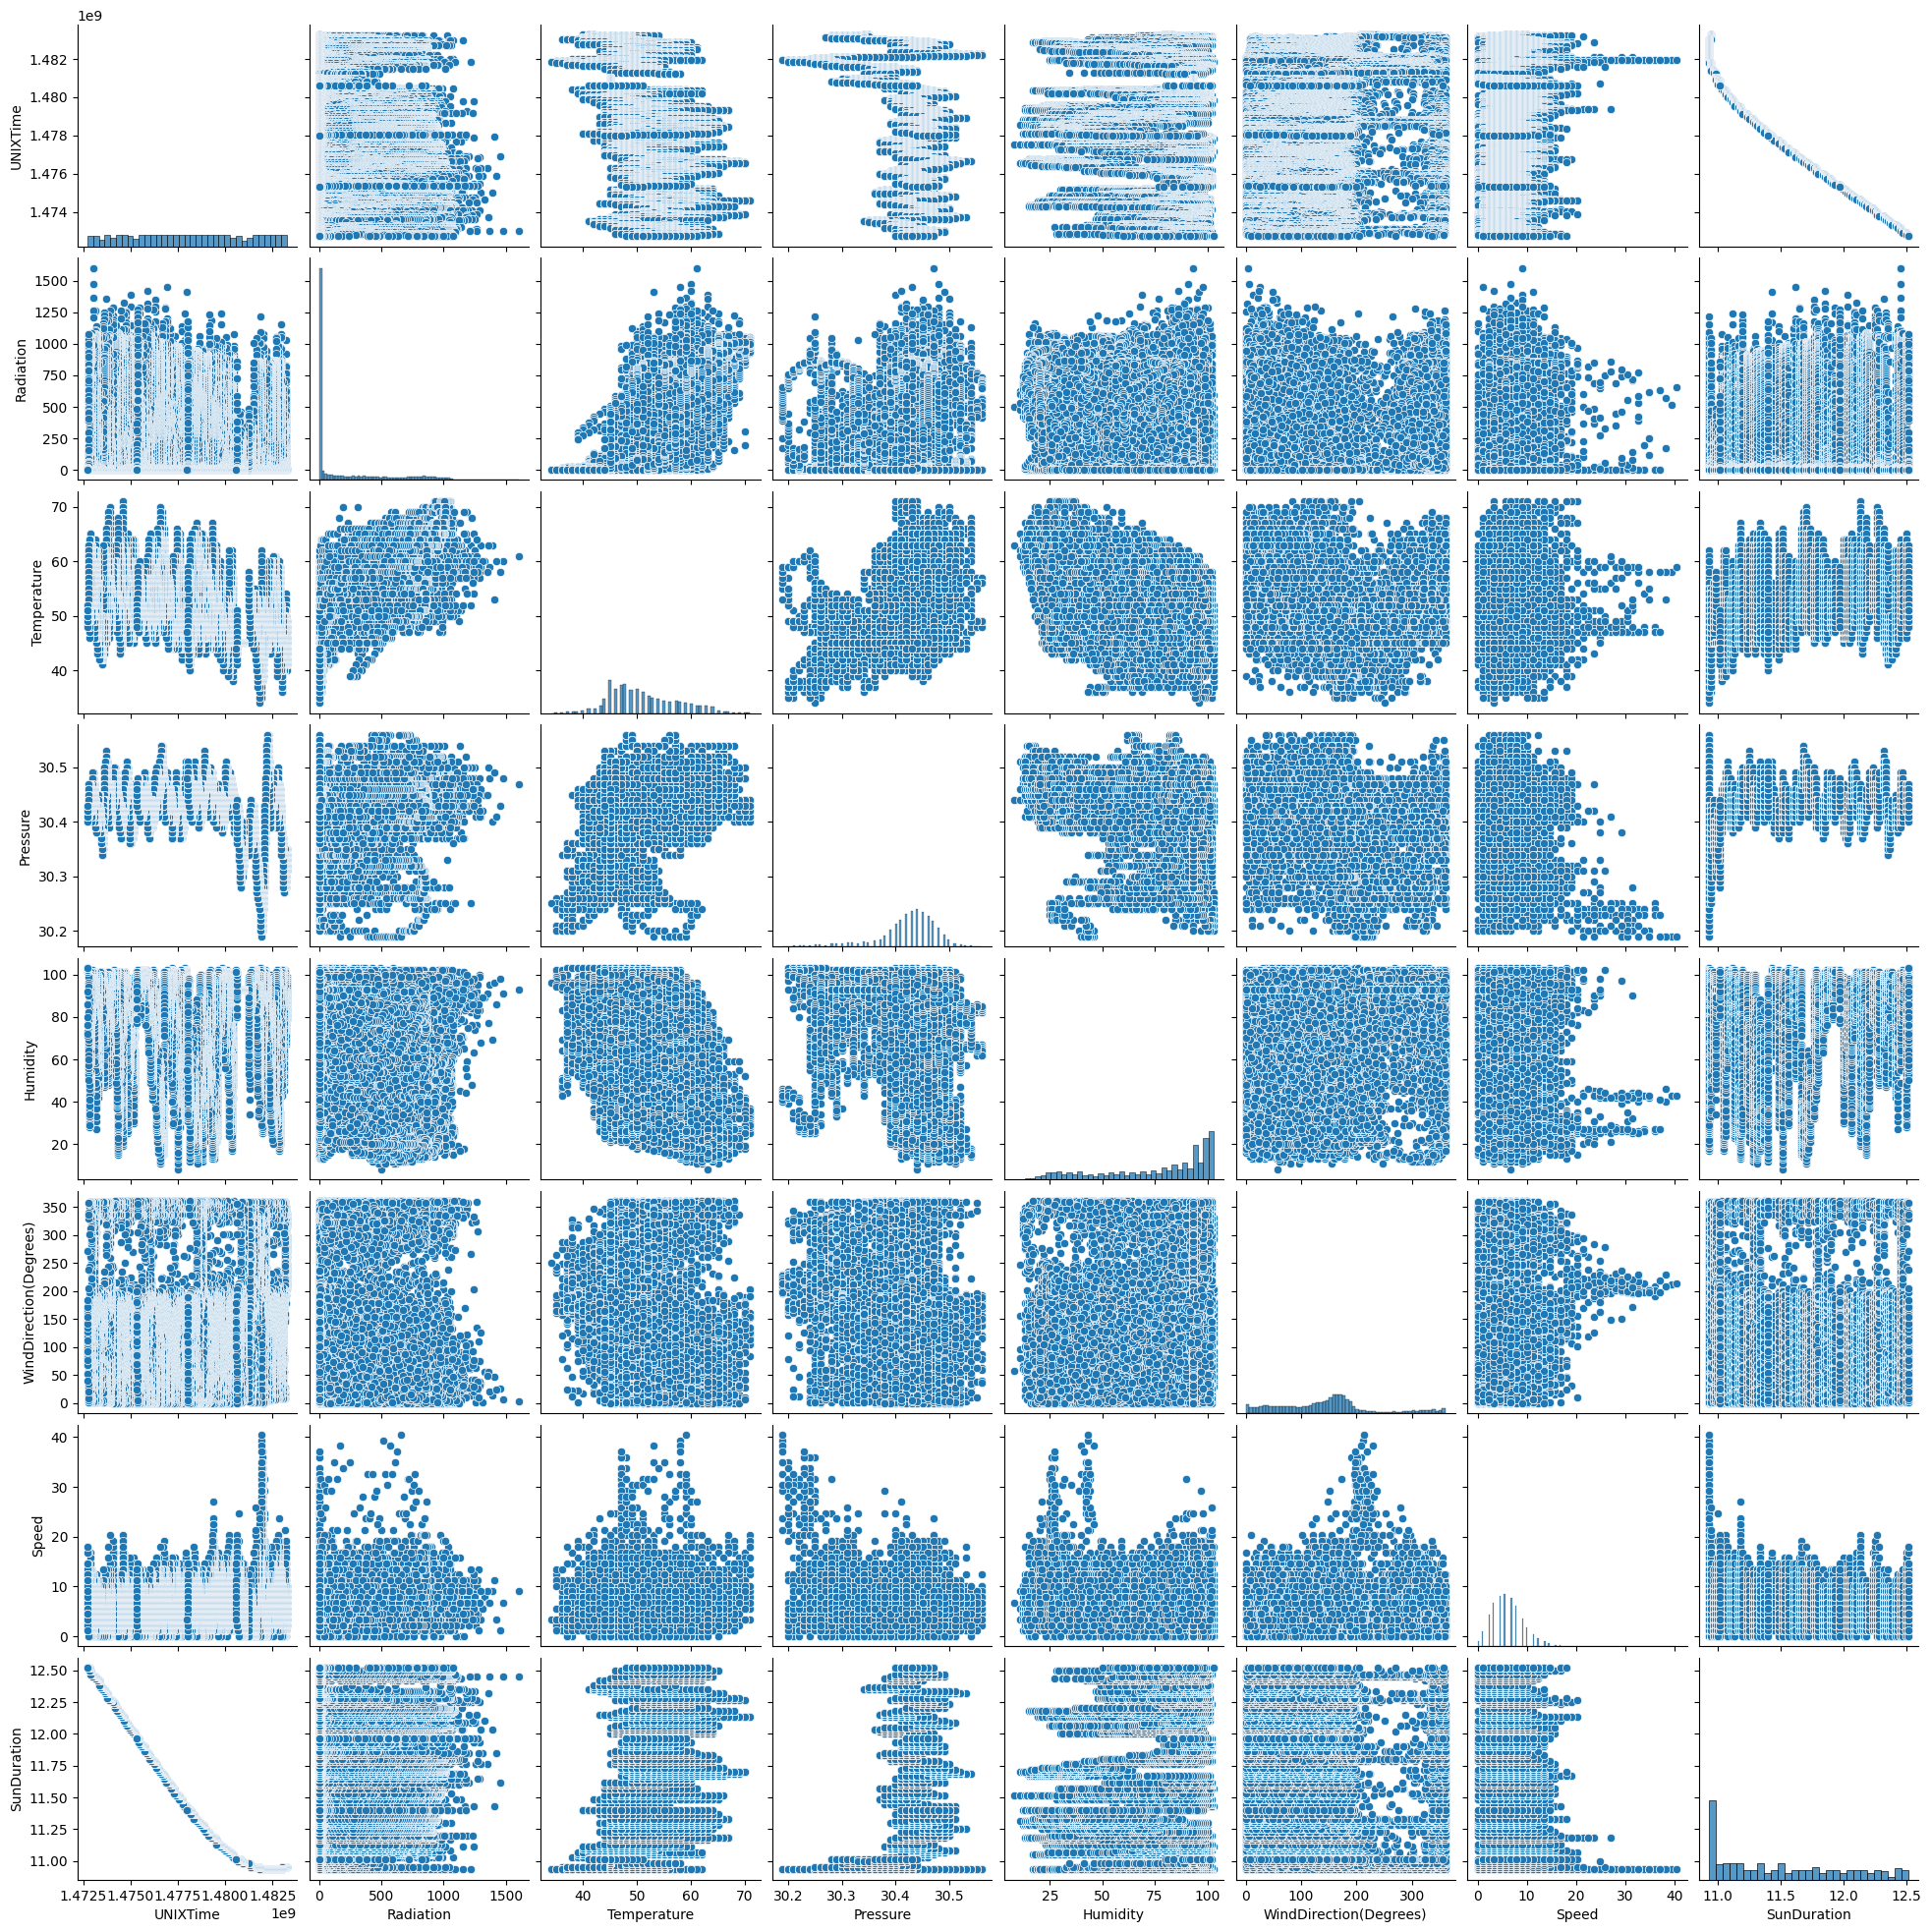

In [ ]:
import seaborn as sns
sns.pairplot(df)

<ipython-input-19-cfa2748fbbd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
<ipython-input-19-cfa2748fbbd4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, ax=ax);


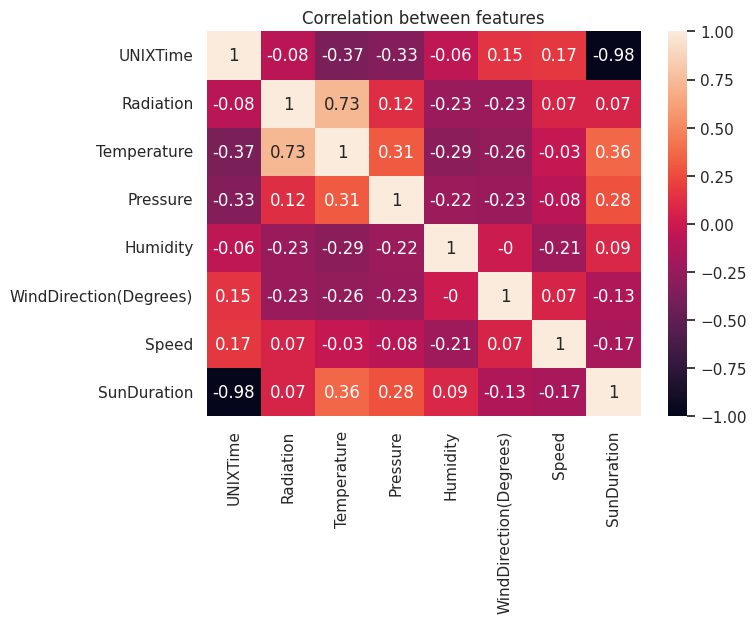

In [ ]:
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
sns.set()
_, ax = plt.subplots(figsize=(7, 5))

# plot the heatmap of correlations
fig = sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, ax=ax);

# set the title
fig.set_title("Correlation between features");

In [ ]:
fig = px.scatter(df, x="Temperature", y="Radiation", title="Relationship between Temperature and Radiation")
fig.show()

In [ ]:
fig = px.scatter(df, x="SunDuration", y="Radiation", title="Relationship between SunDuration and Radiation")
fig.show()

In [ ]:
fig = px.scatter(df, x="Humidity", y="Radiation", title="Relationship between Humidity and Radiation")
fig.show()

In [ ]:
fig = px.bar(df, x="Pressure", y="Radiation",title="Relationship Pressure and Radiation")
fig.show()

In [ ]:
fig = px.box(df, x="Speed", y="Radiation",title="Relationship Speed and Radiation")
fig.show()

In [ ]:
fig = px.histogram(df, x="WindDirection(Degrees)", y="Radiation",title="Relationship WindDirection(Degrees) and Radiation")
fig.show()

**Prediction**

In [ ]:
X = df[['Temperature','Pressure','Humidity','Speed']]
Y = df[['Radiation']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X_train,Y_train)
Y_pred_linear= lin_regressor.predict(X_test)
lin_regressor.score(X_test, Y_test)


0.5604958229670376

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(max_depth=10)
dt_regressor.fit(X_train,Y_train)

dt_regressor.score(X_test, Y_test)

0.656869389775415

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=0)
rf_regressor.fit(X_train,Y_train)
rf_regressor.score(X_test, Y_test)

<ipython-input-30-2e621438e786>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7018760262046789

In [ ]:
Y_pred_rf= rf_regressor.predict(X_test)

In [ ]:
Y_pred_dt= dt_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Calculate the RMSLE
rmsle = np.sqrt(mean_squared_log_error(Y_test, Y_pred_rf))

# Print the RMSLE
print("Decision tree RMSLE:", rmsle)

Decision tree RMSLE: 1.6687190515092079


In [ ]:
from sklearn.metrics import mean_squared_log_error
# Calculate the RMSLE
rmsle = np.sqrt(mean_squared_log_error(Y_test, Y_pred_dt))

# Print the RMSLE
print("Random forest:", rmsle)

Random forest: 1.903623233264101
